In [1]:
%matplotlib inline
#
from lrgsglib.core import *

In [84]:
# lattice parameters
side = 64
pflip = .15
cell = 'rand'
geo = 'squared'
kwLattice2D = dict(side1=side, pflip=pflip, geo=geo, init_nw_dict=True)
# simulation parameters


In [85]:
l = Lattice2D(**kwLattice2D)
l.flip_sel_edges(l.nwDict[cell]['G'])
l.compute_k_eigvV(MODE_dynspec='numpy')

In [110]:
sla = SignedLaplacianAnalysis(l, initspect=False)

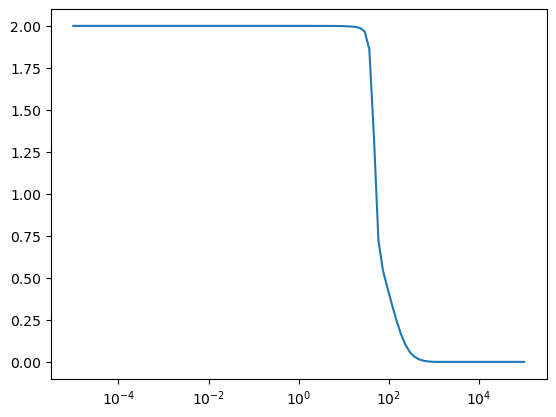

In [97]:
plt.plot(tau_log, S)
plt.xscale('log')

In [98]:
rhoTr = np.exp(-1 * w)
Tr = np.nansum(rhoTr)
rho = np.divide(rhoTr, Tr)
avgrho = np.nansum(np.multiply(w, rhoTr)) / Tr

In [107]:
a = rho.reshape(-1, *l.syshape)

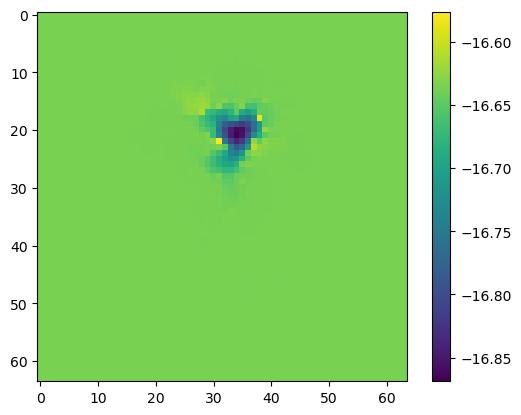

In [109]:
plt.imshow(np.log(a[3]))
plt.colorbar()



In [24]:
def initialize_opinions(G, seed=None):
    if seed is not None:
        random.seed(seed)
    # Randomly assign +1 or -1 opinions to each node
    for node in G.nodes():
        G.nodes[node]['opinion'] = 

def voter_model_simulation(G, steps):
    for _ in range(steps):
        # Select a random node
        node = random.choice(list(G.nodes()))
        # Select a random neighbor
        if len(list(G.neighbors(node))) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            edge_sign = np.sign(G[node][neighbor]['weight'])
            # Update opinion based on edge sign
            if edge_sign == 1:
                G.nodes[node]['opinion'] = G.nodes[neighbor]['opinion']
            else:
                G.nodes[node]['opinion'] = -G.nodes[neighbor]['opinion']

def get_opinions(G):
    return {node: G.nodes[node]['opinion'] for node in G.nodes()}

# Example usage
G = l.G
initialize_opinions(G)
voter_model_simulation(G, 100*side*side)
ops= get_opinions(G)


In [25]:
np.array([l.compute_rbim_energy_eigV(_)/2 for _ in range(2)])

array([-0.9921875 , -0.95214844])

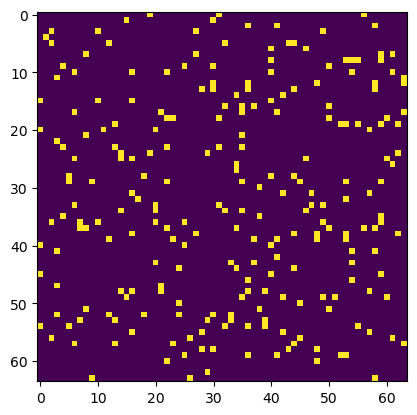

In [26]:
plt.imshow(np.sign(l.eigV[0].reshape(side, side)))

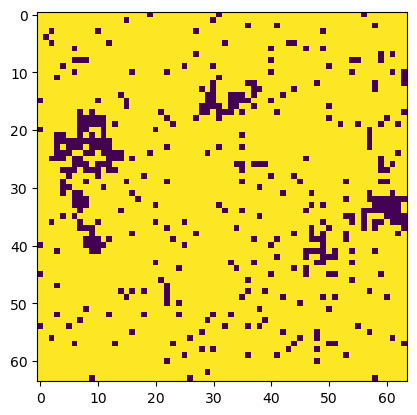

In [27]:
plt.imshow(np.array(list(ops.values())).reshape(side, side))